#  filter warnings

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# 1 Read the Data

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/HP/OneDrive/Documents/class/CSV/training_set (2).csv")

# 2 Drop unnecessary columns(Columsn with no statitical importance)

In [3]:
A.drop(labels=[ "Id", "MSSubClass", "Alley", "LandContour", "Condition2", "HouseStyle", "OverallCond", "YearRemodAdd", "RoofMatl", "Exterior2nd", "MasVnrType", "ExterCond", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "Heating", "Electrical", "1stFlrSF","2ndFlrSF", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "KitchenQual", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageQual", "GarageCond", "WoodDeckSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolQC", "MiscFeature", "SaleCondition", "KitchenAbvGr", "YrSold", "MiscVal", "MoSold", "PoolArea", "BedroomAbvGr", "LotArea", "HalfBath", "OpenPorchSF", "LotFrontage", "BsmtFinSF1", "Fireplaces"], axis=1, inplace=True)


In [4]:
A

,MSZoning,Street,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,OverallQual,...,CentralAir,GrLivArea,FullBath,TotRmsAbvGrd,Functional,GarageArea,PavedDrive,Fence,SaleType,SalePrice
0,RL,Pave,Reg,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,7,...,Y,1710,2,8,Typ,548,Y,NaN,WD,208500
1,RL,Pave,Reg,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,6,...,Y,1262,2,6,Typ,460,Y,NaN,WD,181500
2,RL,Pave,IR1,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,7,...,Y,1786,2,6,Typ,608,Y,NaN,WD,223500
3,RL,Pave,IR1,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,7,...,Y,1717,1,7,Typ,642,Y,NaN,WD,140000
4,RL,Pave,IR1,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,8,...,Y,2198,2,9,Typ,836,Y,NaN,WD,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,6,...,Y,1647,2,7,Typ,460,Y,NaN,WD,175000
1456,RL,Pave,Reg,AllPub,Inside,Gtl,NWAmes,Norm,1Fam,6,...,Y,2073,2,7,Min1,500,Y,MnPrv,WD,210000
1457,RL,Pave,Reg,AllPub,Inside,Gtl,Crawfor,Norm,1Fam,7,...,Y,2340,2,9,Typ,252,Y,GdPrv,WD,266500
1458,RL,Pave,Reg,AllPub,Inside,Gtl,NAmes,Norm,1Fam,5,...,Y,1078,1,5,Typ,240,Y,NaN,WD,142125


# 3 missing data treatment

In [5]:
A.isna().sum()

MSZoning           0
Street             0
LotShape           0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
OverallQual        0
YearBuilt          0
RoofStyle          0
Exterior1st        0
MasVnrArea         8
ExterQual          0
Foundation         0
BsmtQual          37
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
GrLivArea          0
FullBath           0
TotRmsAbvGrd       0
Functional         0
GarageArea         0
PavedDrive         0
Fence           1179
SaleType           0
SalePrice          0
dtype: int64

In [6]:
X=A["MasVnrArea"].mean()
A["MasVnrArea"]=A["MasVnrArea"].fillna(X)

In [7]:
A["MasVnrArea"]

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [8]:
X = A['BsmtQual'].mode()[0]
A['BsmtQual']= A['BsmtQual'].fillna(X)

In [9]:
A['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [10]:
x = A['Fence'].mode()[0]
A['Fence']= A['Fence'].fillna(x)

In [11]:
A['Fence']

0       MnPrv
1       MnPrv
2       MnPrv
3       MnPrv
4       MnPrv
        ...  
1455    MnPrv
1456    MnPrv
1457    GdPrv
1458    MnPrv
1459    MnPrv
Name: Fence, Length: 1460, dtype: object

In [12]:
def replacer(df):
    for i in df.columns:
        if df[i].dtypes=="object":
            x=df[i].mode()[0]
            df[i]=df[i].fillna(x)
        else:
            x=df[i].mean()
            df[i]=df[i].fillna(x)

In [13]:
replacer(A)

# 4. Exploratory Data Analysis


# 4.1 Check for Skew in X columns

In [14]:
A.skew()

OverallQual     0.216944
YearBuilt      -0.613461
MasVnrArea      2.676412
TotalBsmtSF     1.524255
GrLivArea       1.366560
FullBath        0.036562
TotRmsAbvGrd    0.676341
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

In [15]:
A.skew().sort_values()

YearBuilt      -0.613461
FullBath        0.036562
GarageArea      0.179981
OverallQual     0.216944
TotRmsAbvGrd    0.676341
GrLivArea       1.366560
TotalBsmtSF     1.524255
SalePrice       1.882876
MasVnrArea      2.676412
dtype: float64

# 4.2 Remove skew

In [16]:
import numpy as np

In [17]:
B = pd.DataFrame(A.skew().sort_values(),columns=["Skew"])

In [18]:
B [B.Skew > 0.7].index

Index(['GrLivArea', 'TotalBsmtSF', 'SalePrice', 'MasVnrArea'], dtype='object')

In [19]:
columns_with_skew = list(B [B.Skew > 0.7].index)

In [20]:
A[columns_with_skew]

,GrLivArea,TotalBsmtSF,SalePrice,MasVnrArea
0,1710,856,208500,196.0
1,1262,1262,181500,0.0
2,1786,920,223500,162.0
3,1717,756,140000,0.0
4,2198,1145,250000,350.0
...,...,...,...,...
1455,1647,953,175000,0.0
1456,2073,1542,210000,119.0
1457,2340,1152,266500,0.0
1458,1078,1078,142125,0.0


In [21]:
from numpy import log

In [22]:
A[columns_with_skew].apply(log)

,GrLivArea,TotalBsmtSF,SalePrice,MasVnrArea
0,7.444249,6.752270,12.247694,5.278115
1,7.140453,7.140453,12.109011,-inf
2,7.487734,6.824374,12.317167,5.087596
3,7.448334,6.628041,11.849398,-inf
4,7.695303,7.043160,12.429216,5.857933
...,...,...,...,...
1455,7.406711,6.859615,12.072541,-inf
1456,7.636752,7.340836,12.254863,4.779123
1457,7.757906,7.049255,12.493130,-inf
1458,6.982863,6.982863,11.864462,-inf


In [23]:
for col in columns_with_skew:
    m = []
    for i in A[col]:
        if(i == 0):
            m.append(1)
        else:
            m.append(i)     
    A[col] = m

In [24]:
A[columns_with_skew]

,GrLivArea,TotalBsmtSF,SalePrice,MasVnrArea
0,1710,856,208500,196.0
1,1262,1262,181500,1.0
2,1786,920,223500,162.0
3,1717,756,140000,1.0
4,2198,1145,250000,350.0
...,...,...,...,...
1455,1647,953,175000,1.0
1456,2073,1542,210000,119.0
1457,2340,1152,266500,1.0
1458,1078,1078,142125,1.0


In [25]:
A[columns_with_skew].apply(log)

,GrLivArea,TotalBsmtSF,SalePrice,MasVnrArea
0,7.444249,6.752270,12.247694,5.278115
1,7.140453,7.140453,12.109011,0.000000
2,7.487734,6.824374,12.317167,5.087596
3,7.448334,6.628041,11.849398,0.000000
4,7.695303,7.043160,12.429216,5.857933
...,...,...,...,...
1455,7.406711,6.859615,12.072541,0.000000
1456,7.636752,7.340836,12.254863,4.779123
1457,7.757906,7.049255,12.493130,0.000000
1458,6.982863,6.982863,11.864462,0.000000


In [26]:
A[columns_with_skew].apply(log).skew()

GrLivArea     -0.006995
TotalBsmtSF   -5.152705
SalePrice      0.121335
MasVnrArea     0.483252
dtype: float64

In [27]:
A[columns_with_skew].apply(log).skew().sort_values()

TotalBsmtSF   -5.152705
GrLivArea     -0.006995
SalePrice      0.121335
MasVnrArea     0.483252
dtype: float64

# 4.3 Correlation

In [28]:
A.corr()["SalePrice"].sort_values()

MasVnrArea      0.475130
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
TotalBsmtSF     0.613611
GarageArea      0.623431
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

# 4.4 Drop cols from A having very minute or no correlation

In [29]:
cat = []  
con = []
for i in A.columns:
    if(A[i].dtypes=="object"):   
        cat.append(i)
    else:
        con.append(i)

In [30]:
import seaborn as sb               
import matplotlib.pyplot as plt

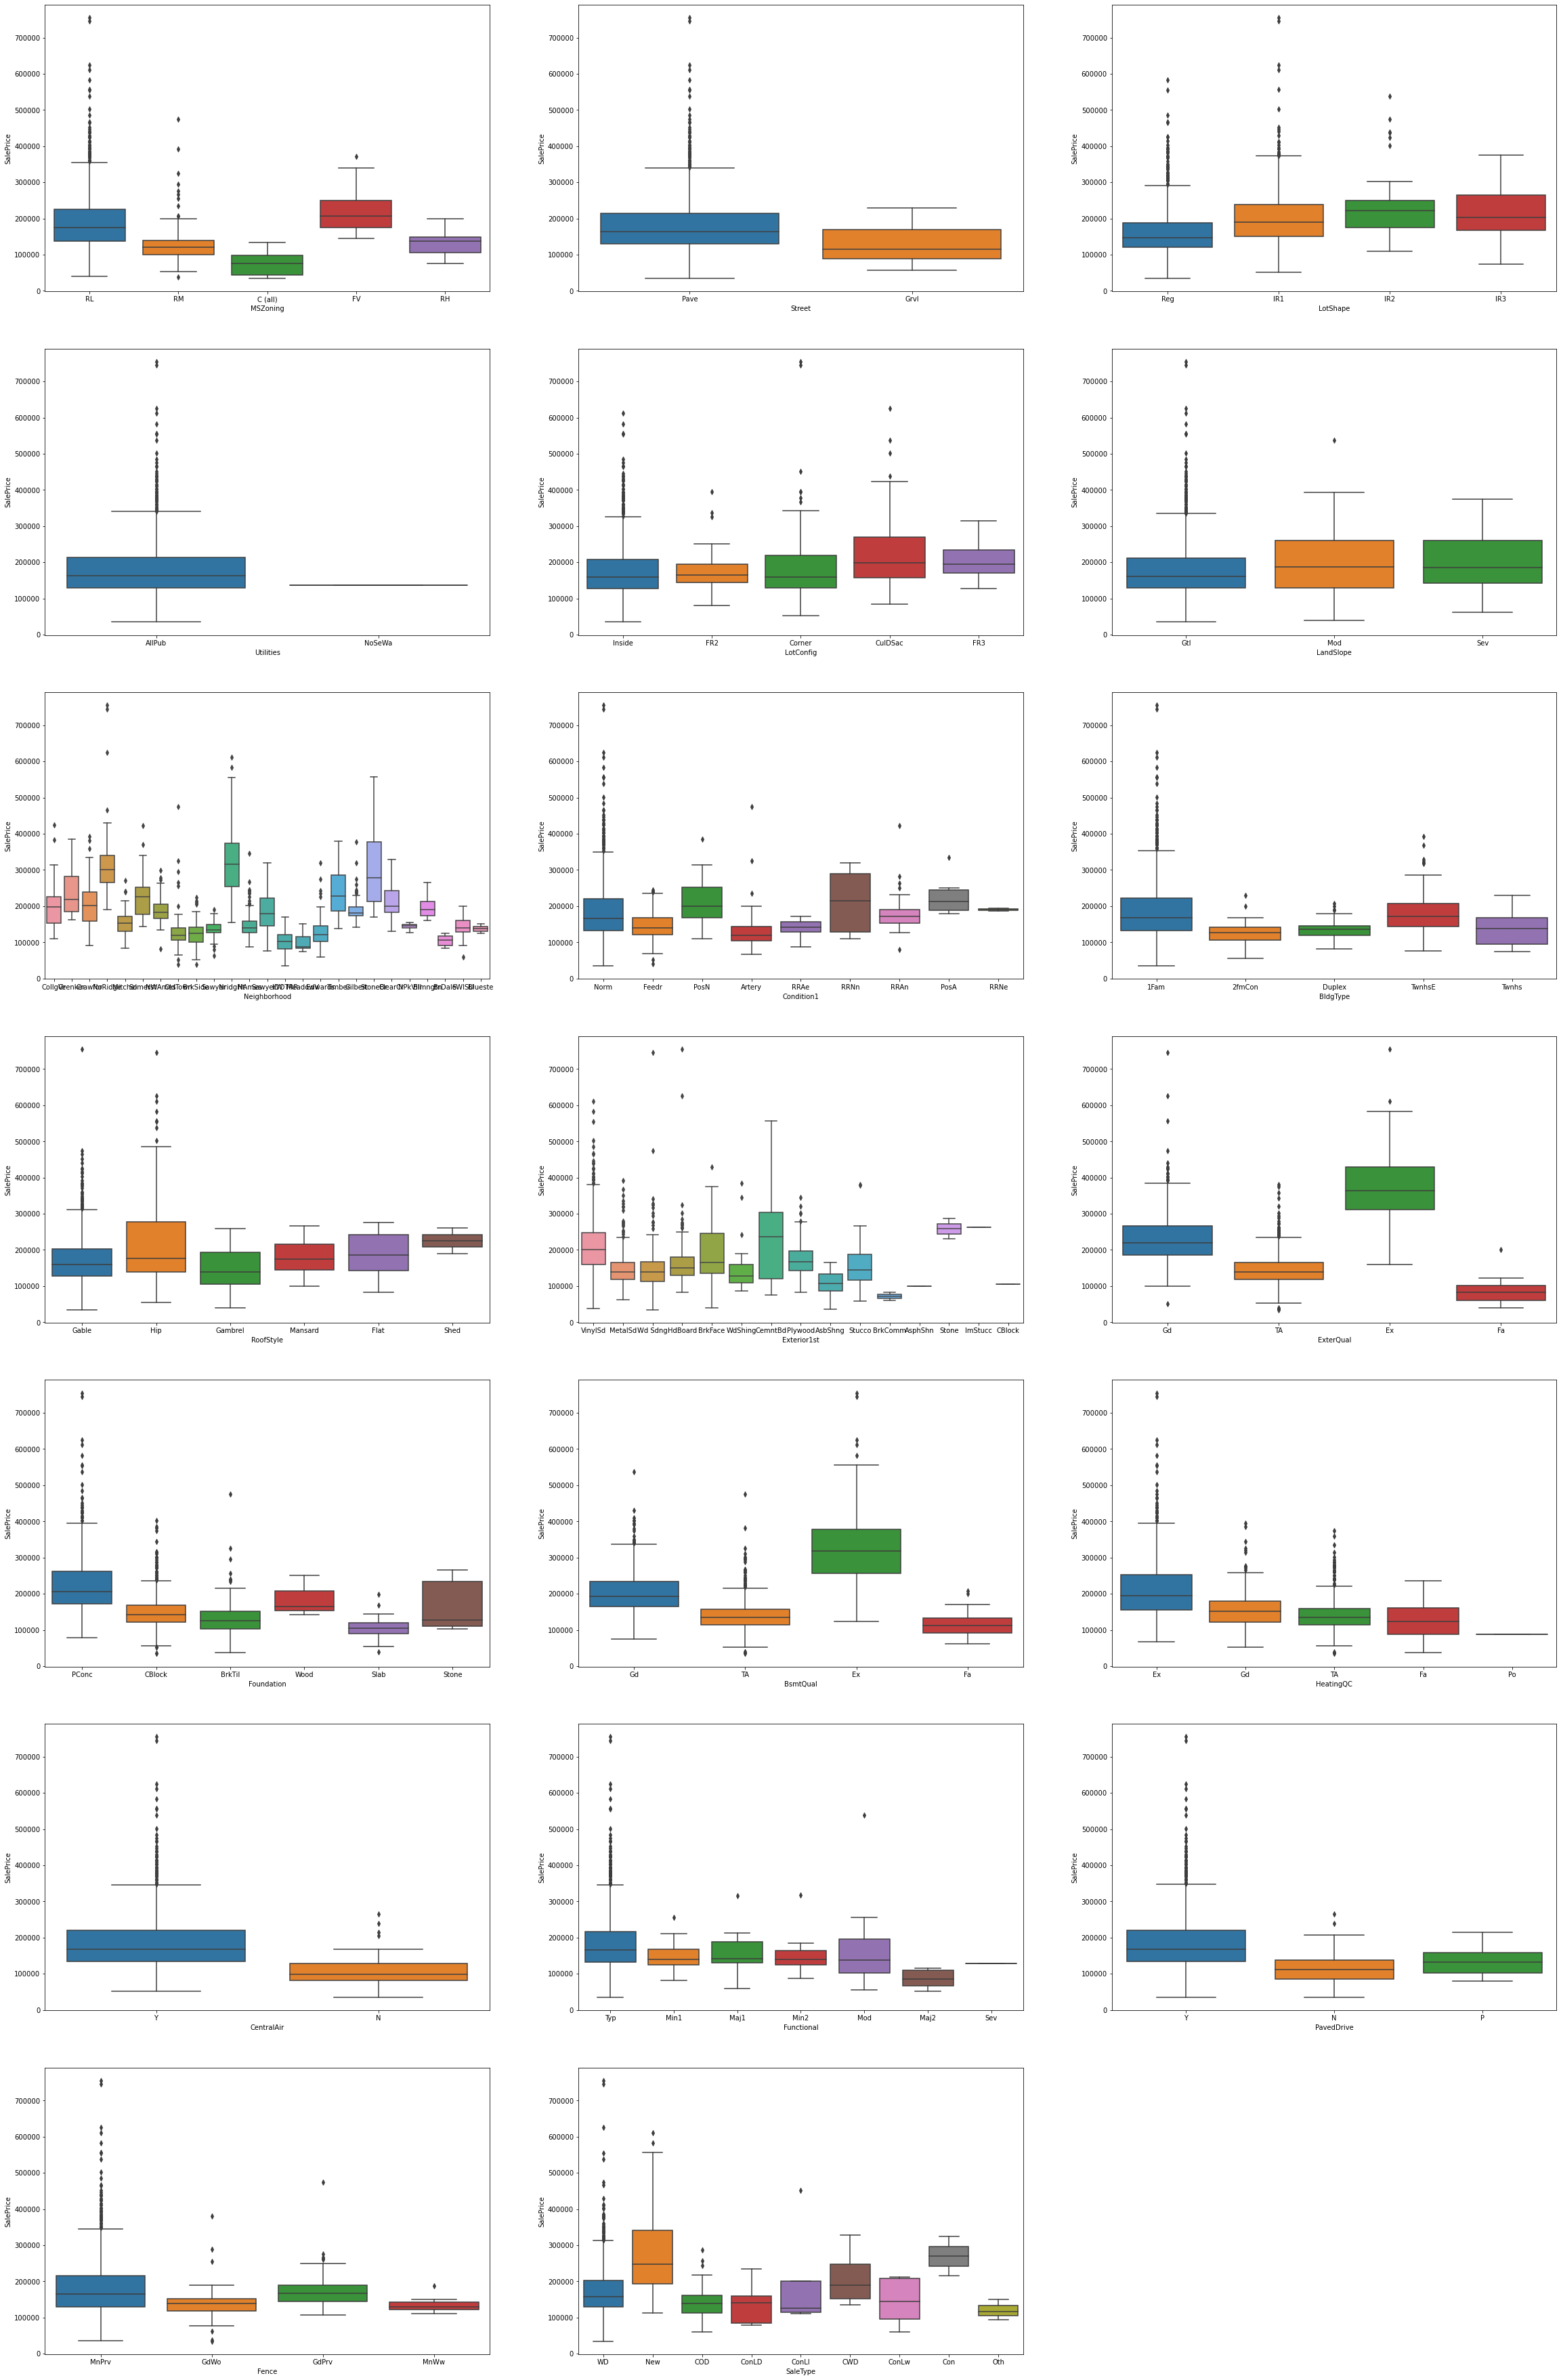

In [31]:
plt.figure(figsize=(40,400))  
m = 1
for i in cat:
    plt.subplot(43,3,m)   
    sb.boxplot(A[i], A.SalePrice) 
    m = m + 1

<Figure size 14400x36000 with 0 Axes>

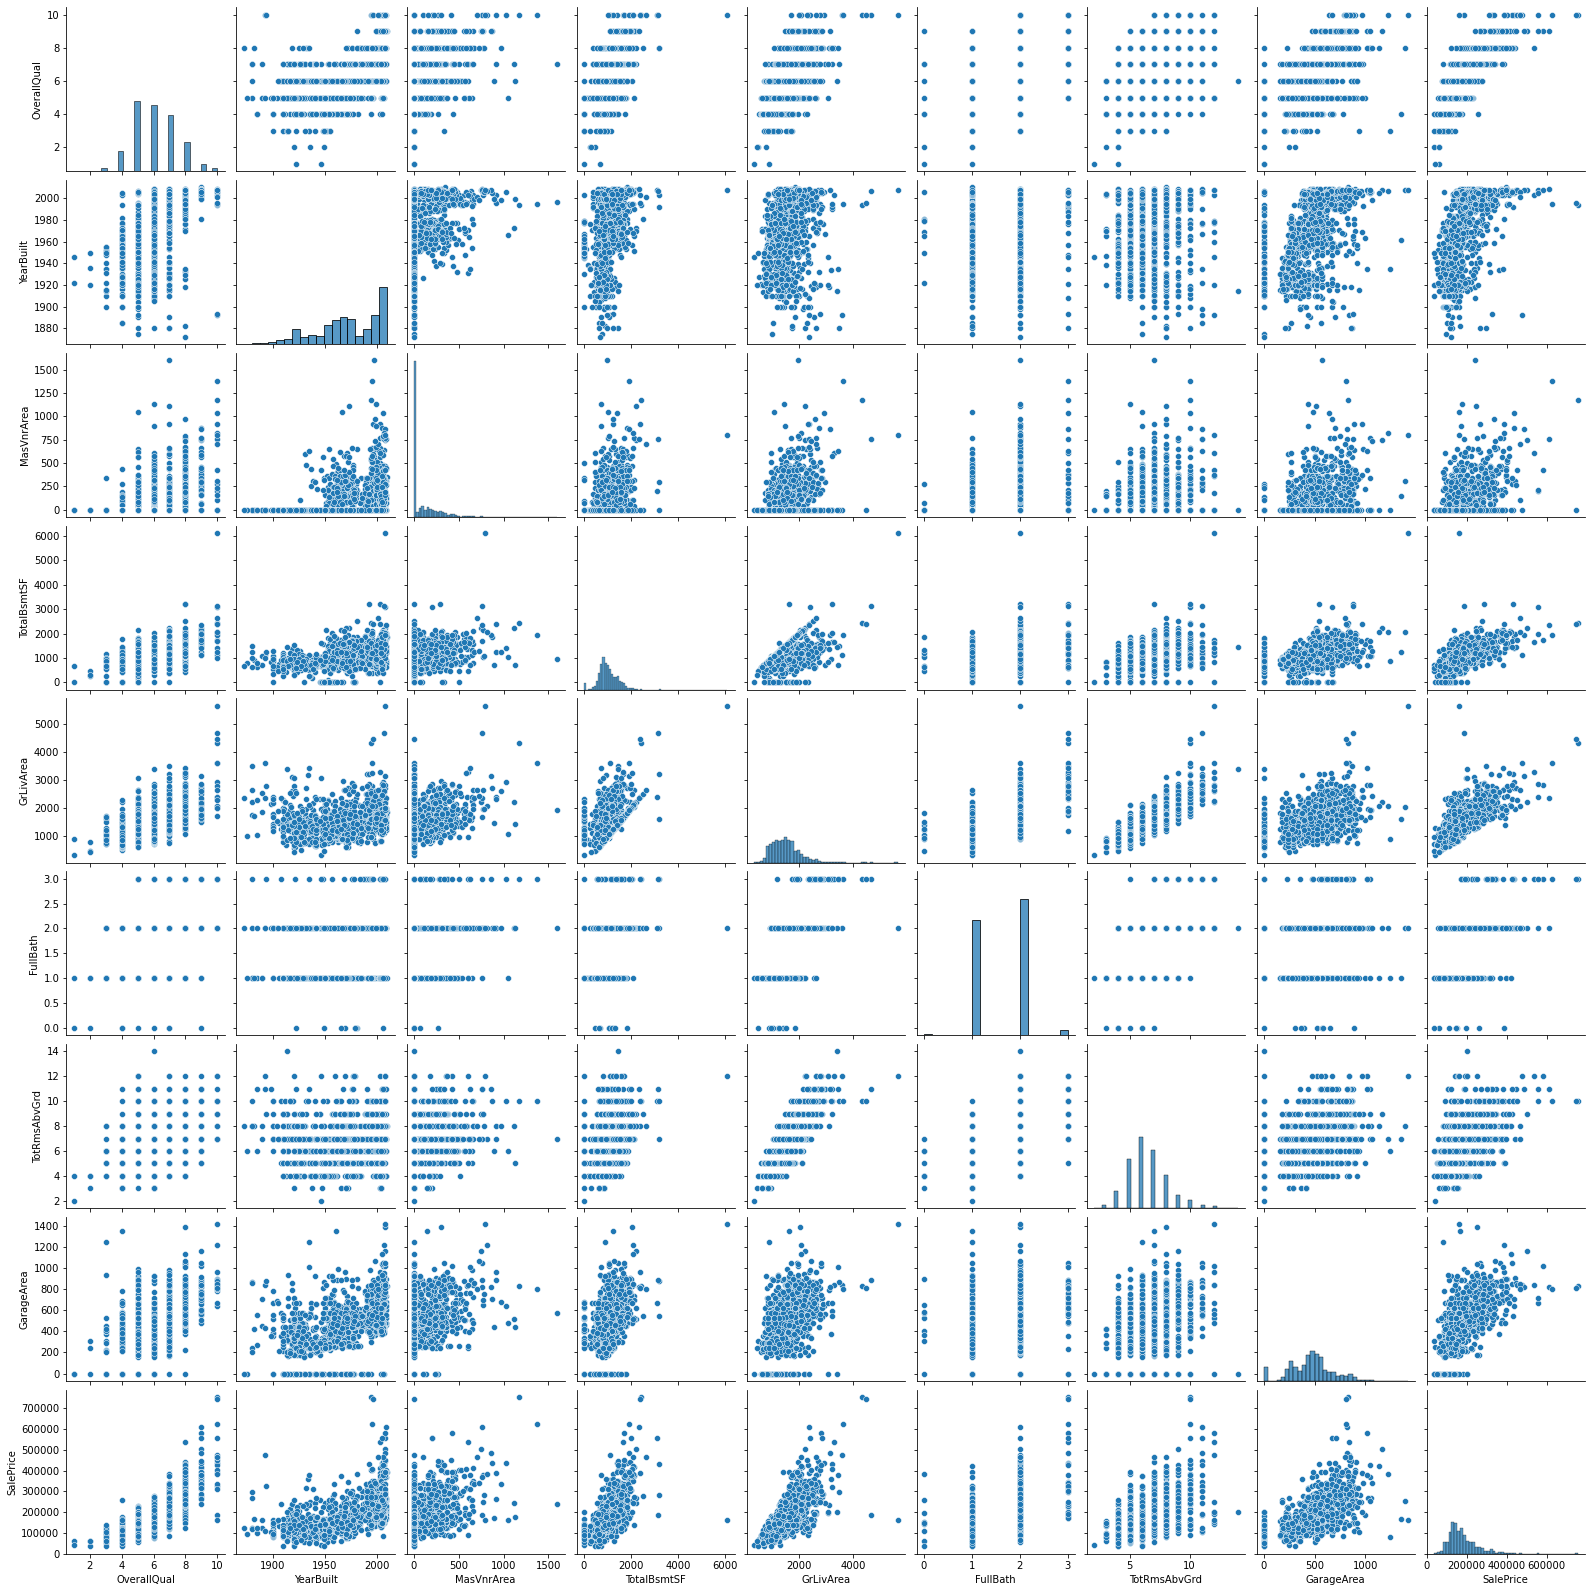

In [32]:
from seaborn import pairplot
plt.figure(figsize=(200,500))
pairplot(A)

Text(0.5, 1.0, 'GarageArea vs SalePrice scatterplot')

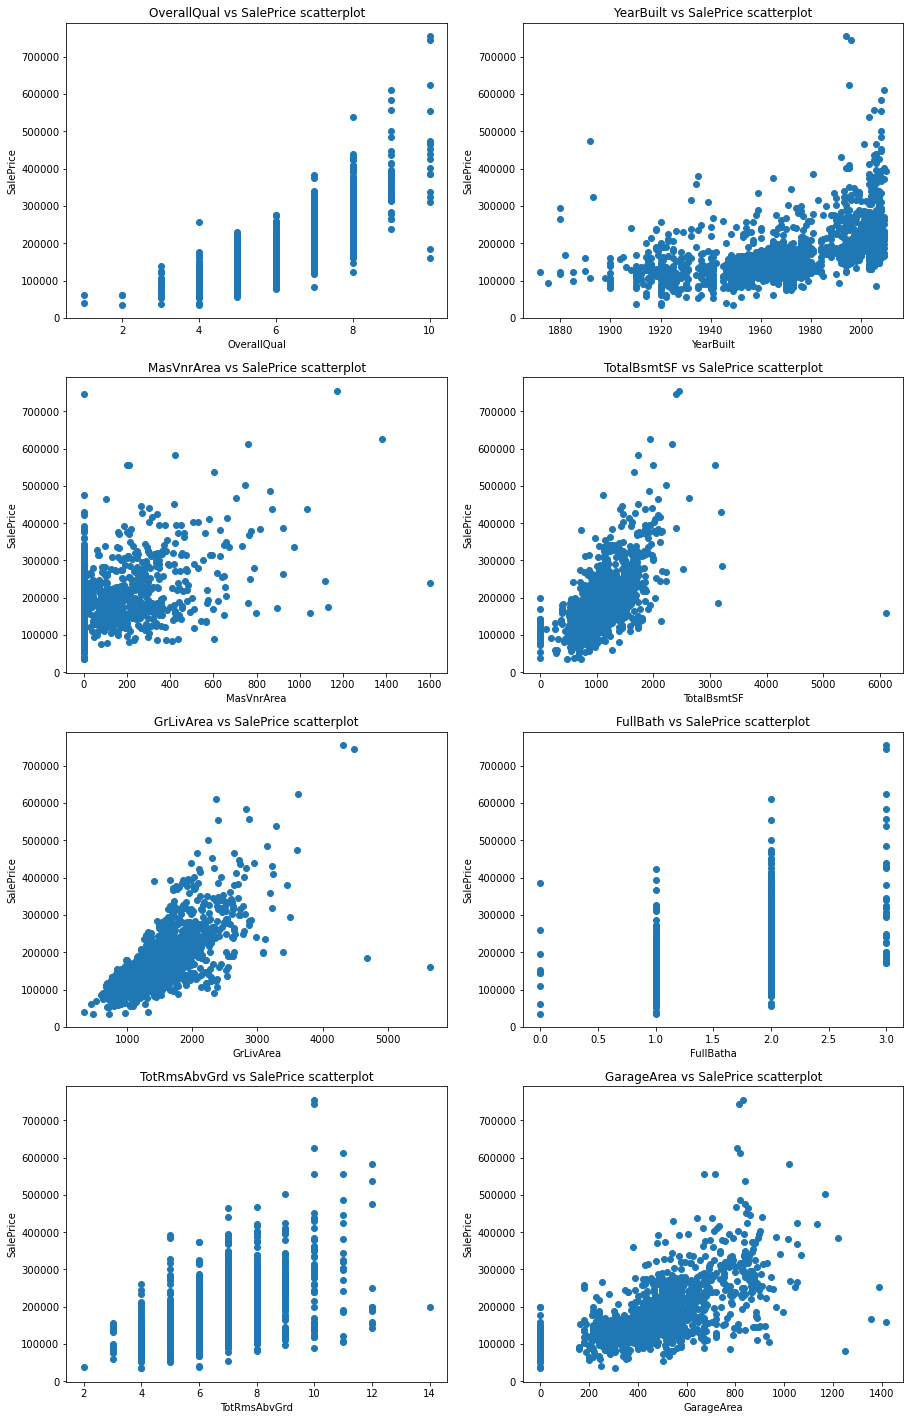

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,25))

plt.subplot(4,2,1)
plt.scatter(A.OverallQual,A.SalePrice)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("OverallQual vs SalePrice scatterplot")

plt.subplot(4,2,2)
plt.scatter(A.YearBuilt,A.SalePrice)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.title("YearBuilt vs SalePrice scatterplot")

plt.subplot(4,2,3)
plt.scatter(A.MasVnrArea,A.SalePrice)
plt.xlabel("MasVnrArea")
plt.ylabel("SalePrice")
plt.title("MasVnrArea vs SalePrice scatterplot")


plt.subplot(4,2,4)
plt.scatter(A.TotalBsmtSF,A.SalePrice)
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.title("TotalBsmtSF vs SalePrice scatterplot")

plt.subplot(4,2,5)
plt.scatter(A.GrLivArea,A.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("GrLivArea vs SalePrice scatterplot")

plt.subplot(4,2,6)
plt.scatter(A.FullBath,A.SalePrice)
plt.xlabel("FullBatha")
plt.ylabel("SalePrice")
plt.title("FullBath vs SalePrice scatterplot")

plt.subplot(4,2,7)
plt.scatter(A.TotRmsAbvGrd,A.SalePrice)
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.title("TotRmsAbvGrd vs SalePrice scatterplot")

plt.subplot(4,2,8)
plt.scatter(A.GarageArea,A.SalePrice)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.title("GarageArea vs SalePrice scatterplot")

# 5 Preprocessing 

# 5.1 Standardization of con columns

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1= pd.DataFrame(ss.fit_transform(A[con]), columns=con)

In [35]:
X1

,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
0,0.651479,1.050994,0.509106,-0.459424,0.370333,0.789741,0.912210,0.351000,0.347273
1,-0.071836,0.156734,-0.573212,0.466472,-0.482512,0.789741,-0.318683,-0.060731,0.007288
2,0.651479,0.984752,0.320394,-0.313470,0.515013,0.789741,-0.318683,0.631726,0.536154
3,0.651479,-1.863632,-0.573212,-0.687478,0.383659,-1.026041,0.296763,0.790804,-0.515281
4,1.374795,0.951632,1.363859,0.199650,1.299326,0.789741,1.527656,1.698485,0.869843
...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,-0.573212,-0.238213,0.250402,0.789741,0.296763,-0.060731,-0.074560
1456,-0.071836,0.222975,0.081729,1.105021,1.061367,0.789741,0.296763,0.126420,0.366161
1457,0.651479,-1.002492,-0.573212,0.215613,1.569647,0.789741,1.527656,-1.033914,1.077611
1458,-0.795151,-0.704406,-0.573212,0.046854,-0.832788,-1.026041,-0.934130,-1.090059,-0.488523


In [36]:
X1.drop(labels=['SalePrice'],axis=1,inplace=True)

In [37]:
X1

,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea
0,0.651479,1.050994,0.509106,-0.459424,0.370333,0.789741,0.912210,0.351000
1,-0.071836,0.156734,-0.573212,0.466472,-0.482512,0.789741,-0.318683,-0.060731
2,0.651479,0.984752,0.320394,-0.313470,0.515013,0.789741,-0.318683,0.631726
3,0.651479,-1.863632,-0.573212,-0.687478,0.383659,-1.026041,0.296763,0.790804
4,1.374795,0.951632,1.363859,0.199650,1.299326,0.789741,1.527656,1.698485
...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,-0.573212,-0.238213,0.250402,0.789741,0.296763,-0.060731
1456,-0.071836,0.222975,0.081729,1.105021,1.061367,0.789741,0.296763,0.126420
1457,0.651479,-1.002492,-0.573212,0.215613,1.569647,0.789741,1.527656,-1.033914
1458,-0.795151,-0.704406,-0.573212,0.046854,-0.832788,-1.026041,-0.934130,-1.090059


# 5.2 One Hot Encoding of Categorical Columns

In [38]:
X2= pd.get_dummies(A[cat])
X2

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
X = X1.join(X2)
X

,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,MSZoning_C (all),MSZoning_FV,...,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0.651479,1.050994,0.509106,-0.459424,0.370333,0.789741,0.912210,0.351000,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.071836,0.156734,-0.573212,0.466472,-0.482512,0.789741,-0.318683,-0.060731,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.651479,0.984752,0.320394,-0.313470,0.515013,0.789741,-0.318683,0.631726,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.651479,-1.863632,-0.573212,-0.687478,0.383659,-1.026041,0.296763,0.790804,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.374795,0.951632,1.363859,0.199650,1.299326,0.789741,1.527656,1.698485,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,-0.573212,-0.238213,0.250402,0.789741,0.296763,-0.060731,0,0,...,0,0,0,0,0,0,0,0,0,1
1456,-0.071836,0.222975,0.081729,1.105021,1.061367,0.789741,0.296763,0.126420,0,0,...,0,0,0,0,0,0,0,0,0,1
1457,0.651479,-1.002492,-0.573212,0.215613,1.569647,0.789741,1.527656,-1.033914,0,0,...,0,0,0,0,0,0,0,0,0,1
1458,-0.795151,-0.704406,-0.573212,0.046854,-0.832788,-1.026041,-0.934130,-1.090059,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
Y = A[["SalePrice"]]
Y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


# 6. Divide data in training & testing set(Random state: 31)0.8,0.2


In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

# 7. Create a backward elemination OLS model

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31) 
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain) 

OLS(ytrain,xconst).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     63.29
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        03:12:26   Log-Likelihood:                -13617.
No. Observations:                1168   AIC:                         2.746e+04
Df Residuals:                    1056   BIC:                         2.802e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.194e+04   3987.000      5.502      0.000    1.41e+04    2.98e+04
OverallQual           1.596e+04   1802.789      8.853      0.000    1.24e+04    1.95e+04
YearBuilt             1312.9208   2661.876      0.493      0.622   -3910.247    6536.089
MasVnrArea            1972.3378   1167.831      1.689      0.092    -319.196    4263.871
TotalBsmtSF           5711.9768   1358.371      4.205      0.000    3046.563    8377.391
GrLivArea             2.694e+04   2241.442     12.018      0.000    2.25e+04    3.13e+04
FullBath              1153.7752   1420.910      0.812      0.417   -1634.352    3941.903
TotRmsAbvGrd         -2483.5860   1849.988     -1.342      0.180   -6113.657    1146.485
GarageArea            6130.6360   1259.412      4.868      0.000    3659.402    8601.870
MSZoning_C (all)     -2.499e+04   1.29e+04     -1.933      0.053   -5.04e+04     375.933
MSZoning_FV           3589.3456   8297.279      0.433      0.665   -1.27e+04    1.99e+04
MSZoning_RH           1.135e+04   8474.059      1.340      0.181   -5273.239     2.8e+04
MSZoning_RL           1.658e+04   4581.708      3.618      0.000    7588.242    2.56e+04
MSZoning_RM            1.54e+04   5039.628      3.056      0.002    5514.760    2.53e+04
Street_Grvl           1.261e+04   9402.049      1.342      0.180   -5835.872    3.11e+04
Street_Pave           9323.2674   8227.709      1.133      0.257   -6821.249    2.55e+04
LotShape_IR1          1.522e+04   3540.153      4.299      0.000    8273.903    2.22e+04
LotShape_IR2          2.712e+04   5166.958      5.249      0.000     1.7e+04    3.73e+04
LotShape_IR3         -3.262e+04   9193.839     -3.548      0.000   -5.07e+04   -1.46e+04
LotShape_Reg          1.221e+04   3569.003      3.422      0.001    5210.957    1.92e+04
Utilities_AllPub      3.048e+04   1.44e+04      2.123      0.034    2308.610    5.86e+04
Utilities_NoSeWa     -8542.5082   1.71e+04     -0.500      0.617    -4.2e+04     2.5e+04
LotConfig_Corner      2776.6409   3970.239      0.699      0.484   -5013.814    1.06e+04
LotConfig_CulDSac     1.539e+04   4704.209      3.273      0.001    6163.901    2.46e+04
LotConfig_FR2        -1436.3208   5236.668     -0.274      0.784   -1.17e+04    8839.138
LotConfig_FR3        -1044.7635   1.32e+04     -0.079      0.937   -2.69e+04    2.48e+04
LotConfig_Inside      6246.1000   3664.207      1.705      0.089    -943.855    1.34e+04
LandSlope_Gtl        -3667.0393   4139.902     -0.886      0.376   -1.18e+04    4456.331
LandSlope_Mod         9496.3007   4635.607      2.049      0.041     400.252    1.86e+04
LandSlope_Sev         1.611e+04   7328.437      2.198      0.028    1727.002    3.05e+04
Neighborhood_Blmngtn  1870.9353   9445.235      0.198      0.843   -1.67e+04    2.04e+04
Neighborhood_Blueste  1.136e+04   3.01e+04      0.377    

# 8. Create a Linear Regression model on the basis of selected columns.

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)


from sklearn.metrics import mean_absolute_error

#training_error
pred = model.predict(xtrain)
MAE_tr = round(mean_absolute_error(ytrain,pred),6)

#testing_error
pred = model.predict(xtest)
MAE_ts = round(mean_absolute_error(ytest,pred),6)

# 9. Find training | testing error --> Overfitting or not

In [44]:
MAE_tr

17714.622432

In [45]:
MAE_ts

26609893098537.92

# 10. Check for colinearity and multicolinearity


In [46]:
X.corr()

,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,MSZoning_C (all),MSZoning_FV,...,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
OverallQual,1.000000,0.572323,0.409937,0.537808,0.593007,0.550600,0.427452,0.562022,-0.132109,0.171854,...,-0.057822,-0.065259,0.034147,0.037524,-0.037305,0.004269,-0.021172,0.327412,-0.057962,-0.225013
YearBuilt,0.572323,1.000000,0.314179,0.391478,0.199010,0.468271,0.095589,0.478954,-0.129736,0.237645,...,-0.061636,-0.065414,-0.028675,0.036472,-0.043304,0.002975,-0.023431,0.346954,0.012122,-0.238463
MasVnrArea,0.409937,0.314179,1.000000,0.362245,0.389945,0.275499,0.279996,0.372332,-0.047603,0.042416,...,-0.026687,0.003804,-0.017971,-0.021230,0.001288,0.015463,-0.022865,0.169035,-0.026010,-0.130458
TotalBsmtSF,0.537808,0.391478,0.362245,1.000000,0.454907,0.323773,0.285607,0.486703,-0.054365,-0.032706,...,-0.033382,0.006231,0.008492,0.015207,-0.031413,0.019270,-0.039552,0.265663,0.003644,-0.212867
GrLivArea,0.593007,0.199010,0.389945,0.454907,1.000000,0.630012,0.825489,0.468997,-0.051232,0.024275,...,-0.056320,-0.024925,0.030312,0.008287,-0.016628,0.017268,-0.022348,0.168368,-0.036522,-0.121102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleType_ConLI,0.004269,0.002975,0.015463,0.019270,0.017268,0.003718,0.053475,-0.005535,-0.004868,-0.012654,...,-0.005108,-0.010212,-0.003073,-0.002171,-0.004617,1.000000,-0.003436,-0.017701,-0.002660,-0.150198
SaleType_ConLw,-0.021172,-0.023431,-0.022865,-0.039552,-0.022348,-0.017570,-0.033113,-0.041904,-0.004868,-0.012654,...,-0.005108,-0.010212,-0.003073,-0.002171,-0.004617,-0.003436,1.000000,-0.017701,-0.002660,-0.150198
SaleType_New,0.327412,0.346954,0.169035,0.265663,0.168368,0.238471,0.147496,0.296671,-0.025077,0.198831,...,-0.026310,-0.052602,-0.015827,-0.011184,-0.023782,-0.017701,-0.017701,1.000000,-0.013702,-0.773680
SaleType_Oth,-0.057962,0.012122,-0.026010,0.003644,-0.036522,-0.019094,-0.014461,-0.080601,-0.003768,-0.009795,...,-0.003954,-0.007905,-0.002378,-0.001681,-0.003574,-0.002660,-0.002660,-0.013702,1.000000,-0.116263


# 11. Ridge Rregression

In [47]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter

# Fit the Ridge Regression model on the training data
ridge_model.fit(xtrain, ytrain)

# Calculate training and testing errors using Ridge Regression
ridge_pred_train = ridge_model.predict(xtrain)
ridge_MAE_train = round(mean_absolute_error(ytrain, ridge_pred_train), 6)

ridge_pred_test = ridge_model.predict(xtest)
ridge_MAE_test = round(mean_absolute_error(ytest, ridge_pred_test), 6)

# Print Ridge Regression training and testing errors
print("Ridge Regression Training MAE:", ridge_MAE_train)
print("Ridge Regression Testing MAE:", ridge_MAE_test)


Ridge Regression Training MAE: 17726.760131
Ridge Regression Testing MAE: 22184.127164


In [48]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter

# Fit the Lasso Regression model on the training data
lasso_model.fit(xtrain, ytrain)

# Calculate training and testing errors using Lasso Regression
lasso_pred_train = lasso_model.predict(xtrain)
lasso_MAE_train = round(mean_absolute_error(ytrain, lasso_pred_train), 6)

lasso_pred_test = lasso_model.predict(xtest)
lasso_MAE_test = round(mean_absolute_error(ytest, lasso_pred_test), 6)

# Print Lasso Regression training and testing errors
print("Lasso Regression Training MAE:", lasso_MAE_train)
print("Lasso Regression Testing MAE:", lasso_MAE_test)


Lasso Regression Training MAE: 17717.9242
Lasso Regression Testing MAE: 22545.773333


# 12. Create a Tuning grid

In [49]:
w = []
x = 0.9900
for i in range(0,200,1):
    x = x + 0.0001
    x = round(x,4)
    w.append(x)


In [50]:
len(w)

200

In [51]:
w[199]

1.01

# 13. GrisearchCv model to find best penalty value for Ridge


In [52]:
from sklearn.linear_model import Ridge
rr = Ridge()
tp = {"alpha":w}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 1.01}

In [53]:
w = []
x = 1.1
for i in range(0,2000,1):
    x = x + 0.0001
    x = round(x,4)
    w.append(x)


In [54]:
len(w)

2000

In [55]:
w[1999]

1.3

In [56]:
from sklearn.linear_model import Ridge
rr = Ridge()
tp = {"alpha":w}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 1.3}

In [57]:
w = []
x = 2
for i in range(0,2000,1):
    x = x + 0.0001
    x = round(x,4)
    w.append(x)

In [58]:
len(w)

2000

In [59]:
w[1999]

2.2

In [60]:
from sklearn.linear_model import Ridge
rr = Ridge()
tp = {"alpha":w}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 2.2}

In [61]:
w = []
x = 3
for i in range(0,2000,1):
    x = x + 0.001
    x = round(x,4)
    w.append(x)

In [62]:
len(w)

2000

In [63]:
w[1999]

5.0

In [64]:
from sklearn.linear_model import Ridge
rr = Ridge()
tp = {"alpha":w}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 5.0}

In [65]:
w = []
x = 5
for i in range(0,2000,1):
    x = x + 0.01
    x = round(x,4)
    w.append(x)

In [66]:
len(w)

2000

In [67]:
w[1999]

25.0

In [68]:
from sklearn.linear_model import Ridge
rr = Ridge()
tp = {"alpha":w}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 15.13}

# 14. Using the best value, create a Ridge model

In [69]:
from sklearn.linear_model import Ridge
rr1 = Ridge(alpha=1.0)
model1 = rr1.fit(xtrain,ytrain)


from sklearn.metrics import mean_absolute_error

#training_error
pred = model1.predict(xtrain)
MAE_tr = round(mean_absolute_error(ytrain,pred),6)

#testing_error
pred = model1.predict(xtest)
MAE_ts = round(mean_absolute_error(ytest,pred),6)  

In [70]:
MAE_tr

17726.760131

In [71]:
MAE_ts

22184.127164

# 15. Check for overfitting.

In [72]:
if MAE_tr < MAE_ts:
    print("Overfitting detected: Training error is lower than testing error.")
else:
    print("No overfitting: Training and testing errors are balanced.")

Overfitting detected: Training error is lower than testing error.


# 16. Using the best model you need to make final predictions

In [76]:
# Make final predictions using the best model
final_predictions = model1.predict(xtest)


In [77]:
final_predictions

array([[219191.91500148],
       [132481.83072406],
       [132832.51005374],
       [176492.3976016 ],
       [119152.96288092],
       [143609.57913801],
       [213476.44797293],
       [247715.34626971],
       [ 92170.83123614],
       [ 46562.77236747],
       [124029.45873105],
       [230845.61903544],
       [159973.56124464],
       [215750.40698963],
       [125687.95214729],
       [145509.23581193],
       [125403.13520053],
       [156302.37700957],
       [250701.76799335],
       [283897.76593005],
       [187840.12567564],
       [217722.21889799],
       [317223.42895987],
       [242204.32283198],
       [183565.6750215 ],
       [194097.32400591],
       [182810.60584746],
       [ 98888.2805809 ],
       [100614.76683818],
       [134464.29039225],
       [312190.7798983 ],
       [125613.49965951],
       [172185.56697247],
       [209536.86480902],
       [175841.16201597],
       [111441.00774845],
       [175783.55450867],
       [167016.17015799],
       [1250